In [1]:
require(ggplot2)
source("00_functions.R")

library(repr)
options(repr.plot.width=8, repr.plot.height=5)
set.seed(111)

Loading required package: ggplot2



 loading required packages



Loading required package: vegan
Loading required package: permute
Loading required package: lattice
This is vegan 2.5-2
Loading required package: hypervolume
Loading required package: Rcpp
Loading required package: rgl
Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”Loading required package: plyr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



### read in data

In [2]:
# abundance
trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
#trees_df = read.csv("../Results/trees_genus_matrix.csv", row.names=1)
mamls_df = read.csv("../Results/m_trap-year.csv", row.names=1)
btles_df = read.csv("../Results/btles_matrix.csv", row.names=1)


# presence/absence
#trees_df   = read.csv("../Results/trees_genus_matrix_PA.csv", row.names=1)
#mamls_df = read.csv("../Results/m_trap-year_PA.csv", row.names=1)
#btles_df = read.csv("../Results/btles_matrix_PA.csv", row.names=1)

###########################################################################

trees_cen = read.csv("../Results/trees_census_dates.csv")
btles_cen = read.csv("../Results/btles_census_dates.csv")
mamls_cen = read.csv("../Results/mamls_years_dates.csv")

### pca on all subplot_census by species matrix

In [3]:
scale = FALSE

trees_pca = do_pca(trees_df, scale = scale, plot = F)
mamls_pca = do_pca(mamls_df, scale = scale, plot = F)
btles_pca = do_pca(btles_df, scale = scale, plot = F)

cat("Explained Varience Trees (first 3 PCs):", sum(trees_pca@exp.var[0:3])*100)
trees_pca@exp.var[0:5]
cat("Explained Varience Mammals (first 3 PCs):", sum(mamls_pca@exp.var[0:3])*100)
mamls_pca@exp.var[0:5]
cat("Explained Varience Beetles: (first 3 PCs)", sum(btles_pca@exp.var[0:3])*100)
btles_pca@exp.var[0:5]

Explained Varience Trees (first 3 PCs): 38.97859

PC1        PC2        PC3        PC4        PC5 
0.28888702 0.05652327 0.04437558 0.03745280 0.03157997

Explained Varience Mammals (first 3 PCs): 61.81098

PC1        PC2        PC3        PC4        PC5 
0.26440642 0.24031383 0.11338956 0.08206127 0.06262138

Explained Varience Beetles: (first 3 PCs) 97.75521

PC1         PC2         PC3         PC4         PC5 
0.875053354 0.084441746 0.018056997 0.006247707 0.004819615

In [4]:
#trees_mds = metaMDS(trees_df, k = 3)
#btles_mds = metaMDS(btles_df, k = 3)
#mamls_mds = metaMDS(mamls_df[rowSums(mamls_df) > 0, ], k = 3)

add_cols = function(df){
    df$plot    = unlist(strsplit(rownames(df), "_"))[ c(T,F,F)]
    df$subplot = unlist(strsplit(rownames(df), "_"))[ c(F,T,F)]
    df$census  = unlist(strsplit(rownames(df), "_"))[ c(F,F,T)]
    
    return(df)
    }

#trees_mds_out = add_cols(as.data.frame(trees_mds$points))
#mamls_mds_out = add_cols(as.data.frame(mamls_mds$points))
#btles_mds_out = add_cols(as.data.frame(btles_mds$points))

### construct hyervolumes

In [5]:
trees_hvs = hvs_rslts(trees_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", trees_cen, method = "gaussian")
mamls_hvs = hvs_rslts(mamls_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", mamls_cen, method = "gaussian")
btles_hvs = hvs_rslts(btles_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", btles_cen, method = "gaussian")

# cat("\n\n")
# cat("Trees: ",   sum(is.na(hvs.rslts_trees@rslts$centroid_PC1))/nrow(hvs.rslts_trees@rslts), "\n")
# cat("Mammals: ", sum(is.na(hvs.rslts_mammals@rslts$centroid_PC1))/nrow(hvs.rslts_mammals@rslts), "\n")
# cat("Beetles: ", sum(is.na(hvs.rslts_beetles@rslts$centroid_PC1))/nrow(hvs.rslts_beetles@rslts))


Building Hypervolume  36  of  36 :  Tower_c4 
Comparing Hypervolume 27  of  27 :  Tower_c3-c4 

Building Hypervolume  28  of  28 :  O_2013
Comparing Hypervolume 24  of  24 :  O_2016-2017

Building Hypervolume  60  of  60 :  VJR_P3
Comparing Hypervolume 40  of  40 :  VJR_P2-P3


In [7]:
#trees_hvs = hvs_rslts(trees_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", trees_cen, method = "gaussian")
#mamls_hvs = hvs_rslts(mamls_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", mamls_cen, method = "gaussian")
#btles_hvs = hvs_rslts(btles_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", btles_cen, method = "gaussian")

### plot hypervolumes

,plot,census_step,centroid_change,overlap,unique_1,unique_2,abs_vol_change,per_vol_change
D_2011-2012,D,2011-2012,1.4316848,0.14187957,0.04415218,0.857184464,407.5573254,5.69288398
D_2012-2013,D,2012-2013,NA,NA,NA,NA,NA,NA
D_2013-2014,D,2013-2014,NA,NA,NA,NA,NA,NA
D_2014-2015,D,2014-2015,1.5827550,0.07274686,0.01087579,0.927194903,471.2678777,12.58591977
D_2015-2016,D,2015-2016,1.4883406,0.02409637,0.97589956,0.006944444,-496.3660185,-0.97573103
D_2016-2017,D,2016-2017,0.5026922,0.33592811,0.57641400,0.381200263,-3.8947852,-0.31547158
E_2011-2012,E,2011-2012,0.8634486,0.44362401,0.52129912,0.141759054,-44.4945065,-0.44223020
E_2012-2013,E,2012-2013,NA,NA,NA,NA,NA,NA
E_2013-2014,E,2013-2014,NA,NA,NA,NA,NA,NA
E_2014-2015,E,2014-2015,0.4453733,0.36927542,0.06141832,0.621580289,21.6956778,1.48026636


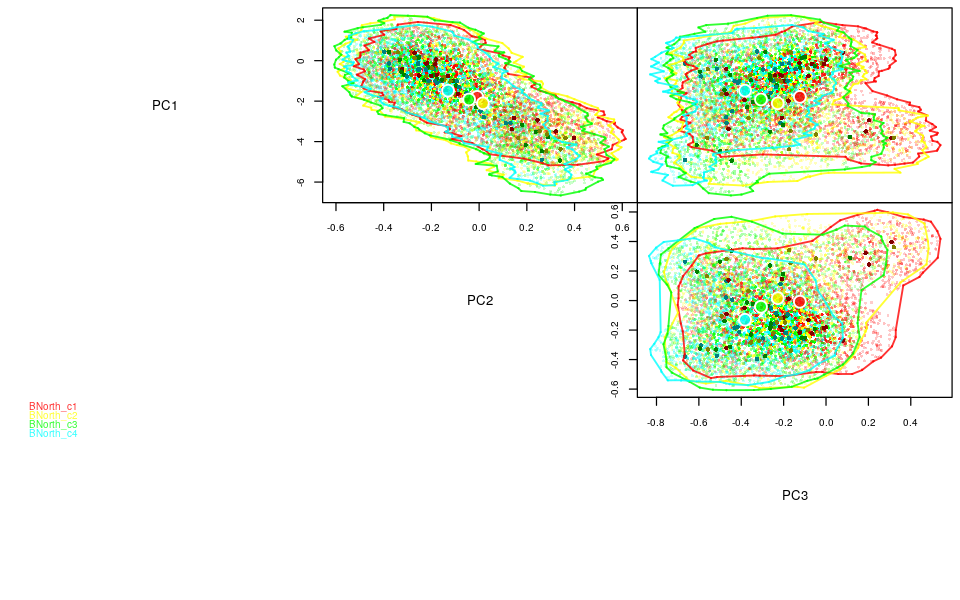

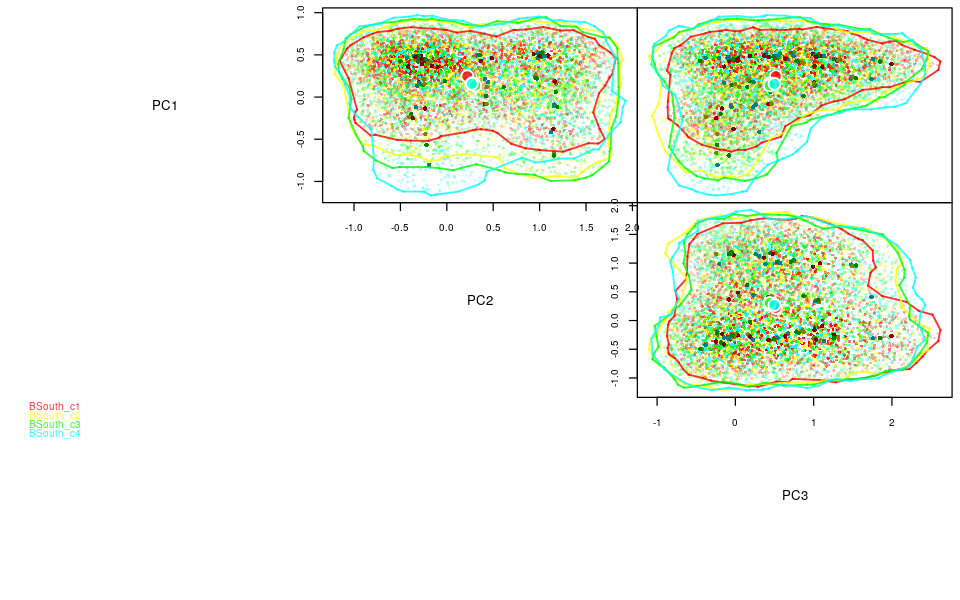

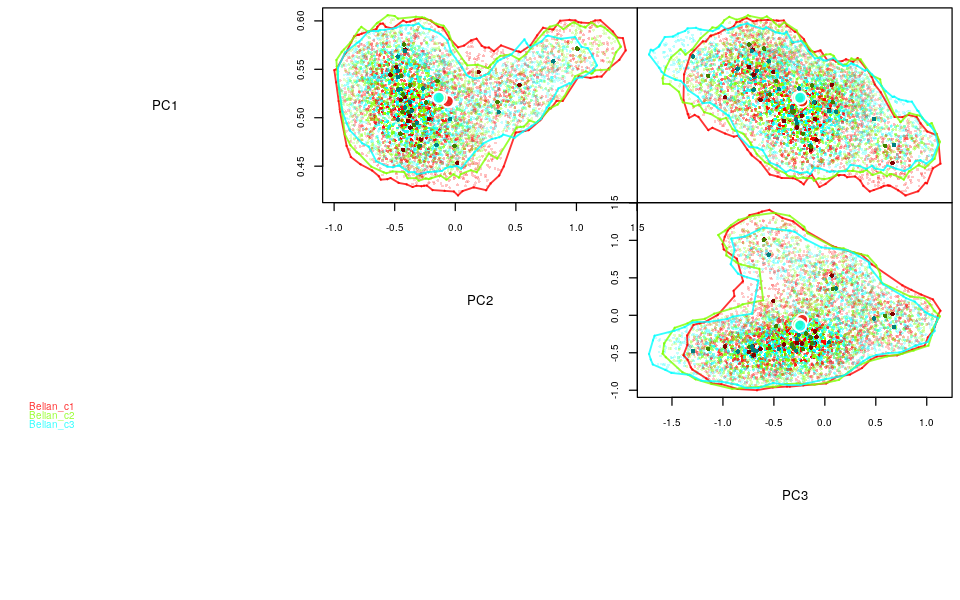

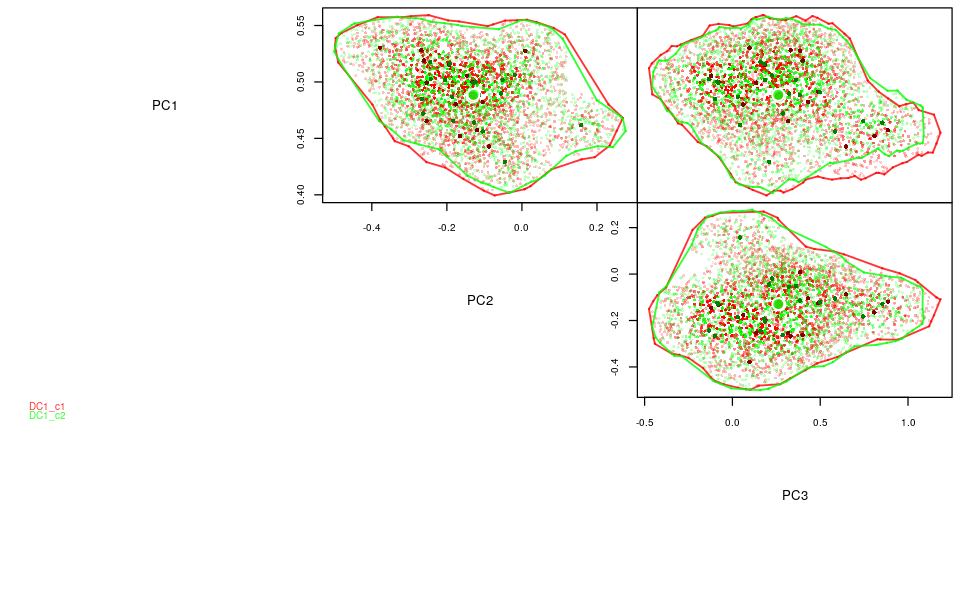

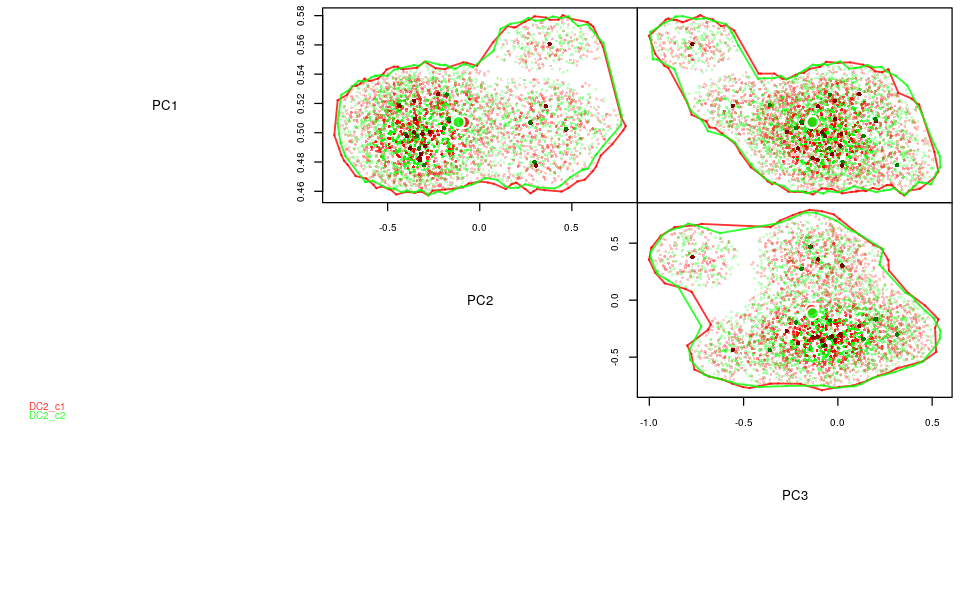

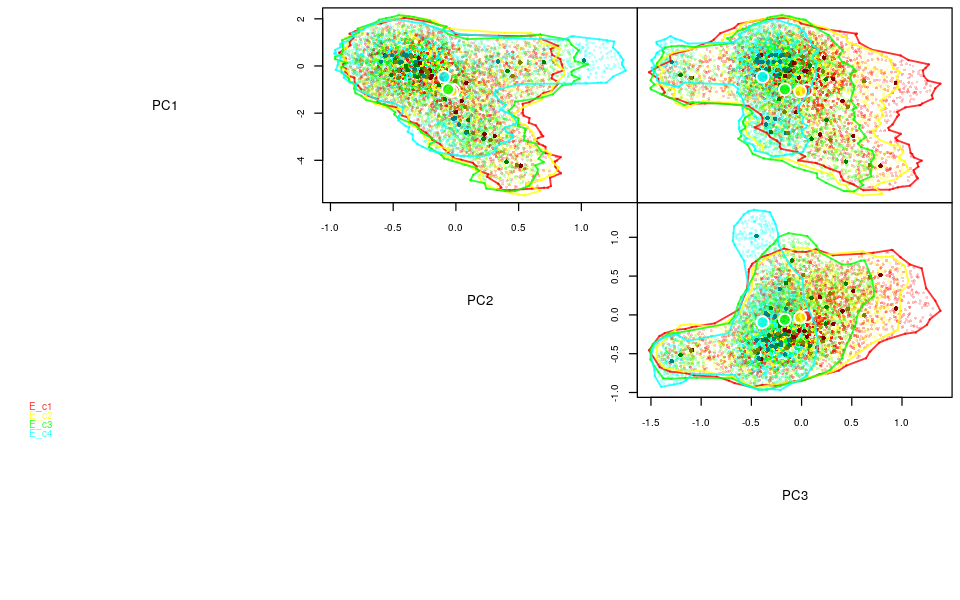

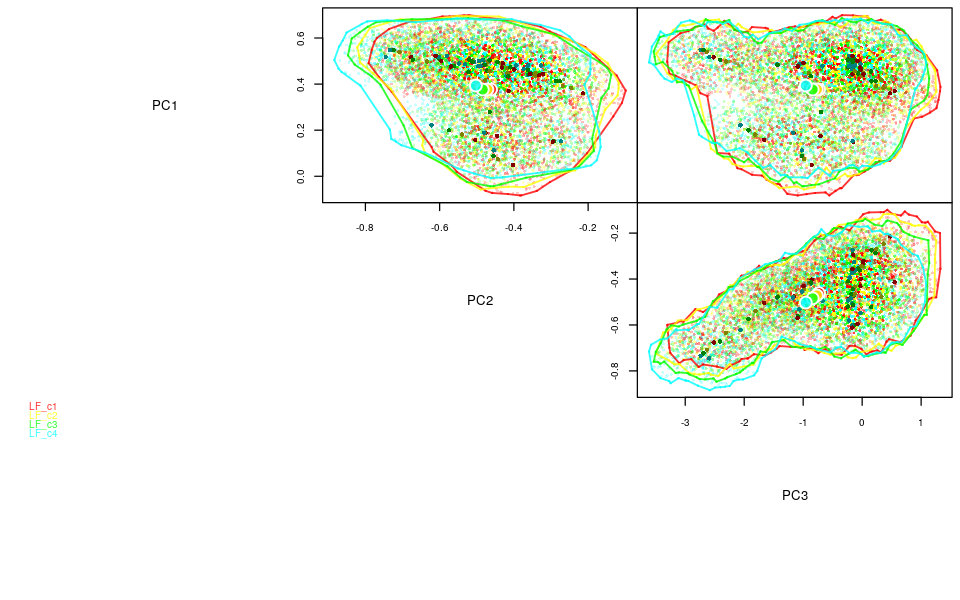

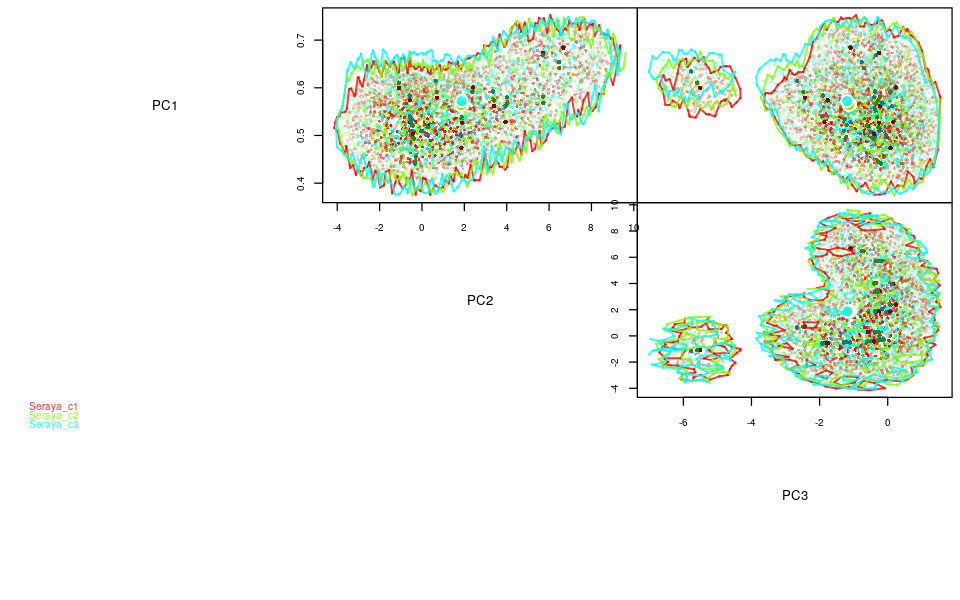

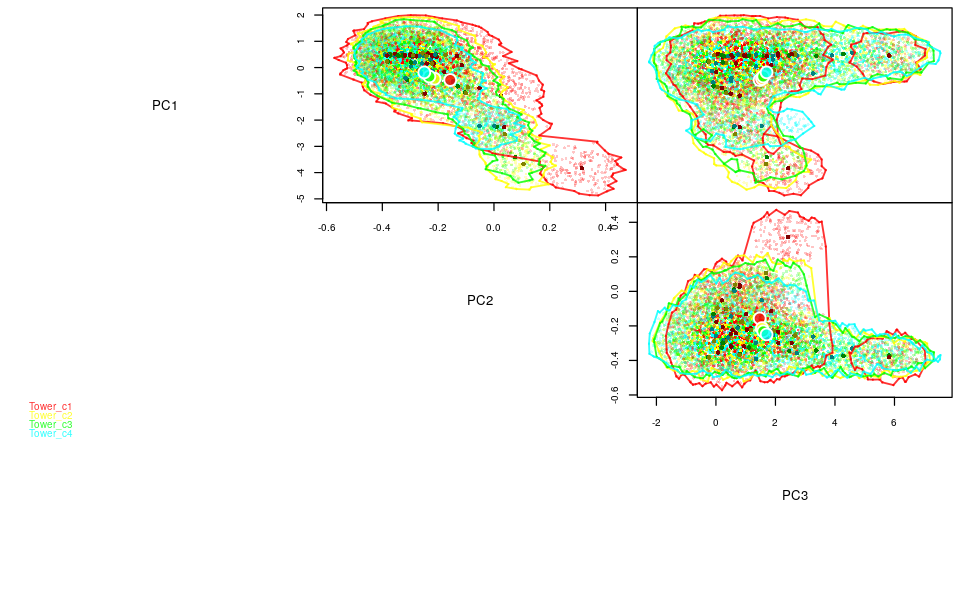

In [8]:
mamls_hvs@compare
plot_hvs(trees_hvs)

### compare hypervolumes

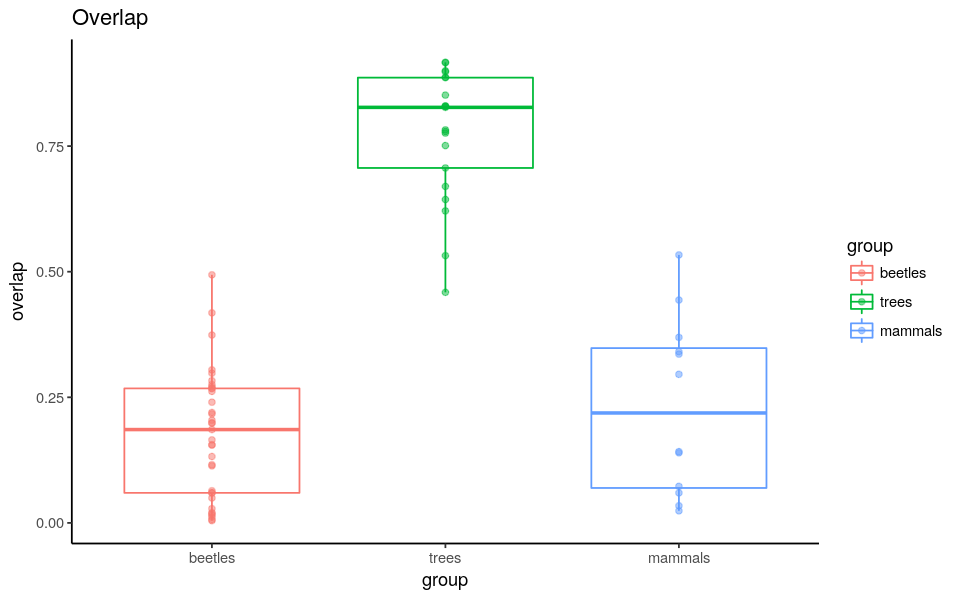

In [9]:
b = data.frame(group = "beetles", overlap = btles_hvs@compare$overlap)
t = data.frame(group = "trees",   overlap = trees_hvs@compare$overlap)
m = data.frame(group = "mammals", overlap = mamls_hvs@compare$overlap)

whisker = rbind(b, t, m)
whisker = whisker[complete.cases(whisker), ]

plt = ggplot(data = whisker, aes(x = group, y = overlap, color = group))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle("Overlap")
print(plt)

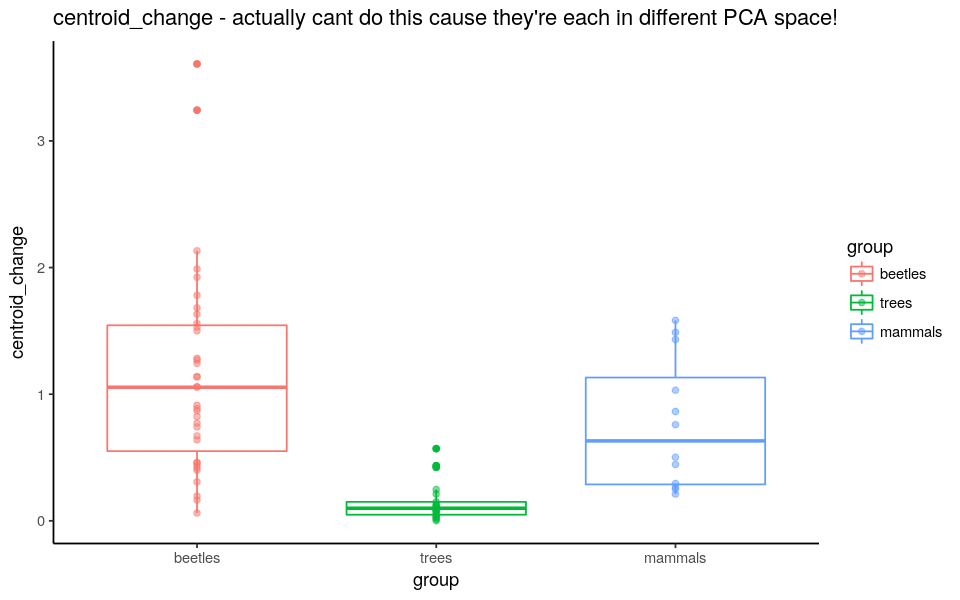

In [10]:
b = data.frame(group = "beetles", centroid_change = btles_hvs@compare$centroid_change)
t = data.frame(group = "trees",   centroid_change = trees_hvs@compare$centroid_change)
m = data.frame(group = "mammals", centroid_change = mamls_hvs@compare$centroid_change)

whisker = rbind(b, t, m)
whisker = whisker[complete.cases(whisker), ]

plt = ggplot(data = whisker, aes(x = group, y = centroid_change, color = group))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + theme_classic()
plt = plt + ggtitle("centroid_change - actually cant do this cause they're each in different PCA space!")
print(plt)

## model???!!!

In [11]:
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

In [12]:
btles = btles_hvs@compare
btles$taxa = "Beetles"
colnames(btles_agb) = c("plot", "agb")
btles = merge(btles, btles_agb, by = "plot")

In [13]:
trees = trees_hvs@compare
trees$taxa = "Trees"
colnames(trees_agb) = c("plot", "agb")
trees = merge(trees, trees_agb, by = "plot")

In [14]:
mamls = mamls_hvs@compare
mamls$taxa = "Mammals"
colnames(mamls_agb) = c("plot", "agb")
mamls = merge(mamls, mamls_agb, by = "plot")

In [15]:
test = rbind(trees, btles, mamls)
test = test[complete.cases(test), ]
test$taxa = as.factor(test$taxa)

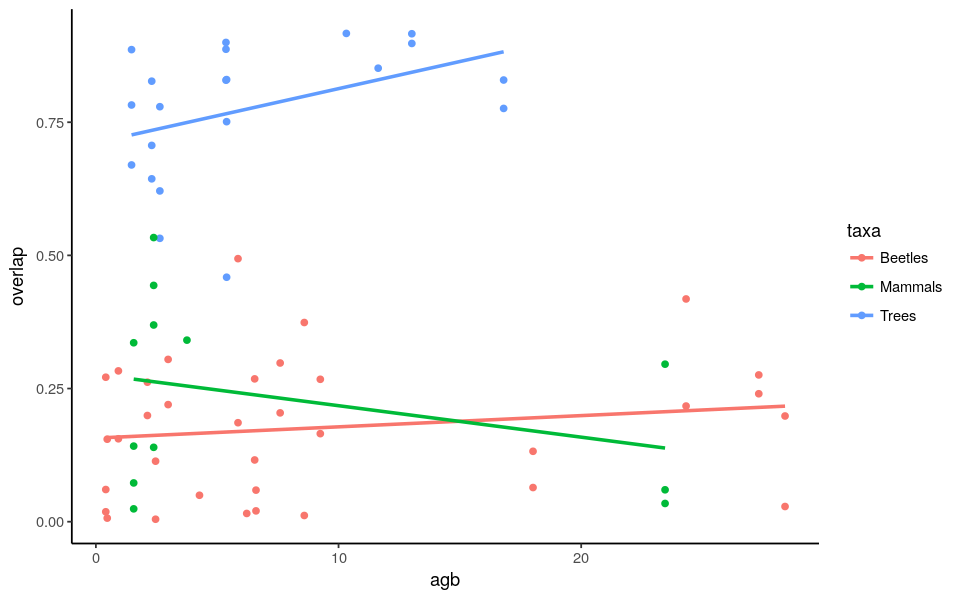

In [16]:
plt = ggplot(data = test, aes(x = agb, y = overlap, color = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + theme_classic()
print(plt)

In [17]:
model = lm(overlap ~ agb*taxa, data = test)
anova(model)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
agb,1,0.04791417,0.04791417,2.690124,1.060364e-01
taxa,2,4.96047299,2.48023650,139.251980,1.170456e-23
agb:taxa,2,0.09597427,0.04798713,2.694220,7.550832e-02
Residuals,62,1.10429068,0.01781114,NA,NA


In [18]:
summary(model)


Call:
lm(formula = overlap ~ agb * taxa, data = test)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30711 -0.10772  0.01268  0.09363  0.32453 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.156952   0.031746   4.944 6.14e-06 ***
agb              0.002110   0.002485   0.849    0.399    
taxaMammals      0.119907   0.058889   2.036    0.046 *  
taxaTrees        0.554293   0.056868   9.747 3.98e-14 ***
agb:taxaMammals -0.008019   0.004855  -1.652    0.104    
agb:taxaTrees    0.008069   0.006364   1.268    0.210    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1335 on 62 degrees of freedom
Multiple R-squared:  0.8221,	Adjusted R-squared:  0.8078 
F-statistic: 57.32 on 5 and 62 DF,  p-value: < 2.2e-16


In [19]:
I_btles = model$coefficients[1]

In [20]:
model$coefficients

(Intercept)             agb     taxaMammals       taxaTrees agb:taxaMammals 
    0.156952472     0.002110331     0.119906547     0.554293488    -0.008019062 
  agb:taxaTrees 
    0.008068548

In [21]:
trees_mdl = lm(overlap ~ agb, data = trees)
mamls_mdl = lm(overlap ~ agb, data = mamls)
btles_mdl = lm(overlap ~ agb, data = btles)

In [22]:
summary(trees_mdl)


Call:
lm(formula = overlap ~ agb, data = trees)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30711 -0.05645  0.04105  0.07233  0.16009 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.711246   0.042574  16.706 8.16e-13 ***
agb         0.010179   0.005286   1.926   0.0693 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1204 on 19 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.1633,	Adjusted R-squared:  0.1192 
F-statistic: 3.708 on 1 and 19 DF,  p-value: 0.06926


In [23]:
summary(btles_mdl)


Call:
lm(formula = overlap ~ agb, data = btles)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18840 -0.11400 -0.00309  0.09411  0.32453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.156952   0.030126   5.210 9.93e-06 ***
agb         0.002110   0.002358   0.895    0.377    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1266 on 33 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.02369,	Adjusted R-squared:  -0.005893 
F-statistic: 0.8008 on 1 and 33 DF,  p-value: 0.3773


In [24]:
summary(mamls_mdl)


Call:
lm(formula = overlap ~ agb, data = mamls)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.243559 -0.123837 -0.005064  0.119233  0.270657 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.276859   0.064313   4.305  0.00155 **
agb         -0.005909   0.005408  -1.093  0.30019   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.173 on 10 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.1066,	Adjusted R-squared:  0.01731 
F-statistic: 1.194 on 1 and 10 DF,  p-value: 0.3002
